In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import decomposition
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [136]:
pwd

'/Users/ssandesh/ML_Gatech/Project3'

## Dataset 1: Water Potability

In [137]:
dataset1 = pd.read_csv('datasets/water_potability.csv')
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X_1  = dataset1.iloc[:, :-1]
Y_1 =  dataset1.iloc[:, -1]
X_1 = preprocessing.scale(X_1)
dataset1.shape
num_dims_1 = dataset1.shape[1]
print(num_dims_1)

10


In [144]:
# https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553
# https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness/
all_dims = np.arange(1,num_dims_1,1)
random_state = 7
kurt_1 = []
err_1 = []
for dim in all_dims:
    ica = decomposition.FastICA(n_components=dim,whiten='unit-variance', max_iter=1000, random_state=random_state)
    for_kutosis = ica.fit_transform(X_1)
    x_prime = for_kutosis
    for_kutosis = pd.DataFrame(for_kutosis)
    for_kutosis = for_kutosis.kurt(axis=0)
    kurt_1.append(for_kutosis.abs().mean())
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_1, reconstructed)
    err_1.append(rc_err)

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


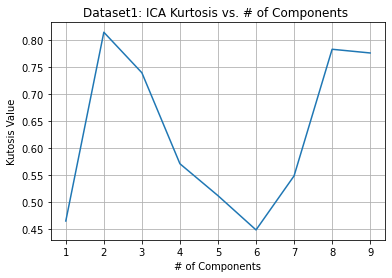

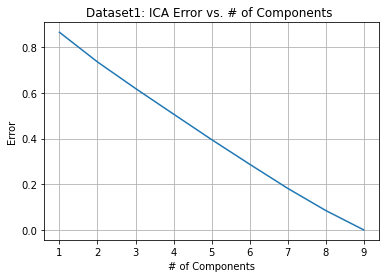

In [145]:
plt.figure()
plt.plot(all_dims,kurt_1)
plt.title('Dataset1: ICA Kurtosis vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Kutosis Value")
plt.grid()
plt.show()

plt.figure()
plt.plot(all_dims,err_1)
plt.title('Dataset1: ICA Error vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Error")
plt.grid()
plt.show()

In [146]:
# K-mean Clusttering
best_component_size = 8
pca_best_1 = decomposition.FastICA(n_components=best_component_size,whiten='unit-variance', max_iter=1000, 
                                   random_state=random_state)
X1_transform = pca_best_1.fit_transform(X_1)
all_new_row = np.arange(1,best_component_size,1)
X_1_df = pd.DataFrame(X_1)
for comp in all_new_row:
    col_name = "newICACol"+str(comp)
    X_1_df[col_name] = X1_transform[:,comp]
    X_1_df[col_name] = X1_transform[:,comp]
X_1_df.head()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,newICACol1,newICACol2,newICACol3,newICACol4,newICACol5,newICACol6,newICACol7
0,2.078984,-1.828068,3.090722,1.277665,-0.128703,-0.753553,1.088361,0.681822,0.297533,3.951661,-0.746136,-0.098855,0.757346,1.147227,-0.126227,-1.617678
1,-1.115227,-1.410276,-0.257351,0.007448,0.067660,-1.741529,-0.017788,-1.262176,0.980764,0.381014,0.799911,-1.744615,0.841463,-1.144979,0.321110,0.405065
2,-2.450827,-2.304309,-0.952113,-0.188325,-0.120995,-2.045930,1.217891,-0.718513,-0.881634,-0.490888,0.394401,-2.638515,1.588386,0.813512,1.264724,1.087707
3,0.614804,0.484727,1.755665,0.715211,-1.985224,1.070392,1.446667,0.426061,-0.856441,0.561441,-0.113316,0.392396,-0.724377,2.433856,-0.849796,-1.983200
4,-1.394854,-1.301434,-1.430297,0.449834,0.402955,0.871784,-0.872434,-0.329142,-0.083905,-0.350428,-0.360460,-1.273999,-0.926564,-0.370597,0.018793,1.598417


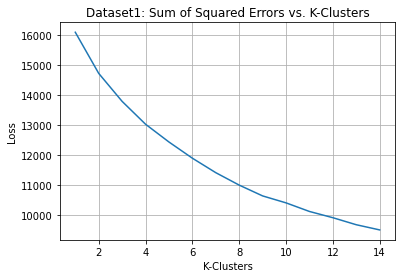

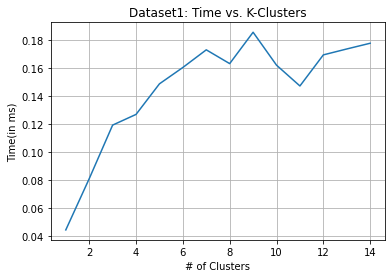

In [147]:
random_state = 7
clusters = np.arange(1,15,1)
sum_of_squared_distances = []
time_array = []
X_1_new = X_1_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X1_transform)
    end_time = tm.time()
    time_array.append(end_time - start_time)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances)
plt.title('Dataset1: Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array)
plt.title('Dataset1: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

-0.0001682749402521189
For n_clusters = 2 The average silhouette_score is : 0.09872900622761999
For n_clusters = 2 The average homogeneity_score is : 0.00019879779264535442
-0.00042267469042883666
For n_clusters = 3 The average silhouette_score is : 0.09095479889416347
For n_clusters = 3 The average homogeneity_score is : 0.0001830758690212066
0.0005031286282930795
For n_clusters = 4 The average silhouette_score is : 0.09117422991367027
For n_clusters = 4 The average homogeneity_score is : 0.0018757500563232874
0.0015764317791079141
For n_clusters = 5 The average silhouette_score is : 0.0937345480421261
For n_clusters = 5 The average homogeneity_score is : 0.004143996602863626
0.0003616892583859194
For n_clusters = 6 The average silhouette_score is : 0.09702705613115102
For n_clusters = 6 The average homogeneity_score is : 0.0025071473174573637
0.001292619526361724
For n_clusters = 7 The average silhouette_score is : 0.09861254686079786
For n_clusters = 7 The average homogeneity_score 

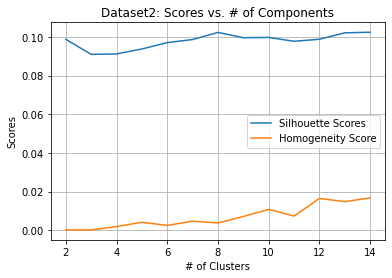

In [121]:
from sklearn import metrics
random_state = 7
clusters = np.arange(2,15,1)
sum_of_squared_distances = []
X_1_new = X_1_df.to_numpy()
silhouette_scores_1 = []
homog_scores_1 = []
for cluster in clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(metrics.adjusted_mutual_info_score(Y_1, cluster_labels))
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_1.append(silhouette_avg)
    homog_scores_1.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_1, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_1,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Scores")
plt.legend(loc="best")
plt.grid()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.09321855167149877
For n_clusters = 2 The average homogeneity_score is : 3.348708912671342e-05
For n_clusters = 3 The average silhouette_score is : 0.0742993750775946
For n_clusters = 3 The average homogeneity_score is : 0.001840221845046099
For n_clusters = 4 The average silhouette_score is : 0.051667339936441715
For n_clusters = 4 The average homogeneity_score is : 0.007461609774757624
For n_clusters = 5 The average silhouette_score is : 0.062126396733354
For n_clusters = 5 The average homogeneity_score is : 0.014338826463829349
For n_clusters = 6 The average silhouette_score is : 0.050974376062959514
For n_clusters = 6 The average homogeneity_score is : 0.008707294145560698
For n_clusters = 7 The average silhouette_score is : 0.05166914938107315
For n_clusters = 7 The average homogeneity_score is : 0.008564354430805872
For n_clusters = 8 The average silhouette_score is : 0.057036414716166335
For n_clusters = 8 The average homogen

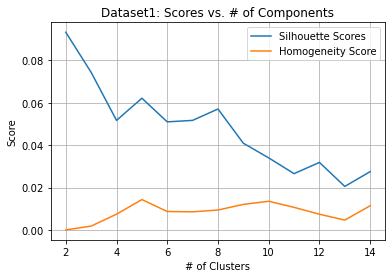

In [122]:
## Expectation Maximization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gmm_1 = []
homog_scores_gmm_1 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gmm_1.append(silhouette_avg)
    homog_scores_gmm_1.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gmm_1, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gmm_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [123]:
n_clusters=np.arange(2, 12, 1)
bics_gmm_1=[]
bics_err_1=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X1_transform) 
        
        tmp_bic.append(gmm.bic(X1_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_gmm_1.append(val)
    bics_err_1.append(err)


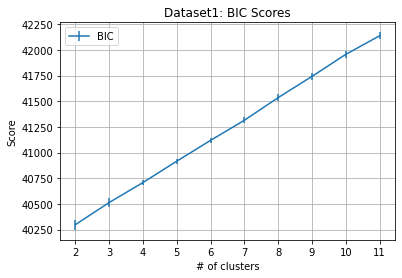

In [124]:
plt.errorbar(n_clusters,bics_gmm_1, yerr=bics_err_1, label='BIC')
plt.title("Dataset1: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()

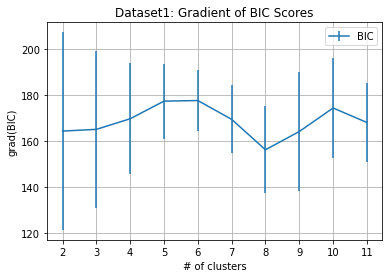

In [108]:
plt.errorbar(n_clusters, np.gradient(bics_gmm_1), yerr=bics_err_1, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Dataset 2: Raisin Dataset

In [ ]:
for dim in all_dims:
    ica = decomposition.FastICA(n_components=dim,whiten='unit-variance', max_iter=1000, random_state=random_state)
    for_kutosis = ica.fit_transform(X_1)
    x_prime = for_kutosis
    for_kutosis = pd.DataFrame(for_kutosis)
    for_kutosis = for_kutosis.kurt(axis=0)
    kurt_1.append(for_kutosis.abs().mean())
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_1, reconstructed)
    err_1.append(rc_err)

In [173]:
dataset2 = pd.read_excel('datasets/Raisin_Dataset.xlsx')
dataset2 = shuffle(dataset2) 
dataset2.dropna(inplace=True)
X_2 = dataset2.iloc[:, :-1]
Y_2 =  dataset2.iloc[:, -1]
X_2 = preprocessing.scale(X_2)
num_dims_2 = dataset2.shape[1]

In [216]:
all_dims = np.arange(1,num_dims_2,1)
random_state = 7
kurt_2 = []
err_2 = []
for dim in all_dims:
    ica = decomposition.FastICA(n_components=dim,whiten='unit-variance', max_iter=1000, random_state=random_state)
    for_kutosis = ica.fit_transform(X_2)
    x_prime = for_kutosis
    A = np.linalg.pinv(ica.components_.T)
    for_kutosis = pd.DataFrame(for_kutosis)
    for_kutosis = for_kutosis.kurt(axis=0)
    kurt_2.append(for_kutosis.abs().mean())
    
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_2, reconstructed)    
    err_2.append(rc_err)
    print(err_2)

[0.3096730555946624]
[0.3096730555946624, 0.10207470709906771]
[0.3096730555946624, 0.10207470709906771, 0.012296211681705546]
[0.3096730555946624, 0.10207470709906771, 0.012296211681705546, 0.004178424201640001]
[0.3096730555946624, 0.10207470709906771, 0.012296211681705546, 0.004178424201640001, 0.0010629572641279725]
[0.3096730555946624, 0.10207470709906771, 0.012296211681705546, 0.004178424201640001, 0.0010629572641279725, 0.00014435853426292172]
[0.3096730555946624, 0.10207470709906771, 0.012296211681705546, 0.004178424201640001, 0.0010629572641279725, 0.00014435853426292172, 2.8068331499445297e-30]


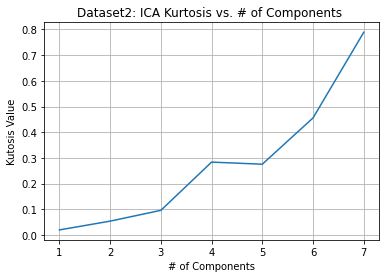

In [228]:
np_kurt_2 = np.asarray(kurt_2)
vector_norm = np_kurt_2/np.linalg.norm(np_kurt_2)
plt.figure()
plt.plot(all_dims,vector_norm)
plt.title('Dataset2: ICA Kurtosis vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Kutosis Value")
plt.grid()
plt.show()

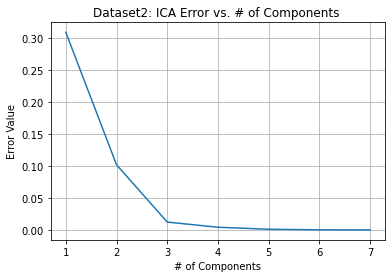

In [215]:
plt.figure()
plt.plot(all_dims,err_2)
plt.title('Dataset2: ICA Error vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Error Value")
plt.grid()
plt.show()

In [179]:
best_component_size = 3
ica_best_2 = decomposition.FastICA(n_components=best_component_size,whiten='unit-variance', max_iter=1000, 
                                   random_state=random_state)
X2_transform = ica_best_2.fit_transform(X_2)
all_new_row = np.arange(1,best_component_size,1)
X_2_df = pd.DataFrame(X_2)
for comp in all_new_row:
    col_name = "newPCACol"+str(comp)
    X_2_df[col_name] = X2_transform[:,comp]
    X_2_df[col_name] = X2_transform[:,comp]
X_2_df.head()

,0,1,2,3,4,5,6,newPCACol1,newPCACol2
0,3.019280,1.740075,3.196489,-0.283304,2.903305,1.305814,2.086648,-0.108939,0.827742
1,-0.077735,-0.126312,0.192367,-0.094795,-0.019464,-0.034375,0.159625,-0.065437,0.197112
2,0.799988,0.451925,1.216152,-0.260561,0.765435,1.589854,0.696209,1.004523,0.068232
3,0.229804,0.228916,0.458329,0.151366,0.258449,1.668752,0.302777,1.357005,-0.625835
4,-0.574856,-0.857040,-0.024923,-1.508159,-0.598898,1.222373,-0.696174,1.201193,1.088411


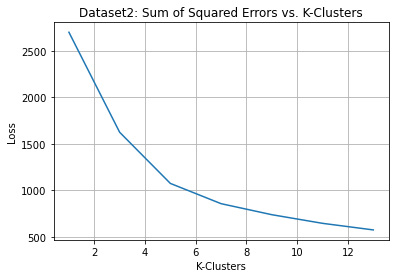

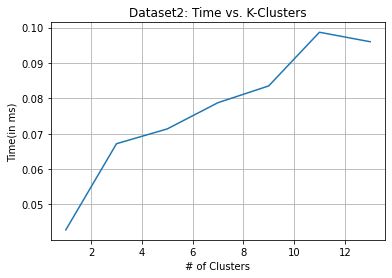

In [180]:
random_state = 7
clusters = np.arange(1,15,2)
sum_of_squared_distances_2 = []
time_array_2 = []
X_2_new = X_2_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X2_transform)
    end_time = tm.time()
    time_array_2.append(end_time - start_time)
    sum_of_squared_distances_2.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances_2)
plt.title('Dataset2: Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array_2)
plt.title('Dataset2: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.286288518044534
For n_clusters = 2 The average homogeneity_score is : 0.2932995457622153
For n_clusters = 3 The average silhouette_score is : 0.2771644916022756
For n_clusters = 3 The average homogeneity_score is : 0.25090280613158294
For n_clusters = 4 The average silhouette_score is : 0.29174534422338033
For n_clusters = 4 The average homogeneity_score is : 0.30954677742437076
For n_clusters = 5 The average silhouette_score is : 0.26358700200584284
For n_clusters = 5 The average homogeneity_score is : 0.2599888880379507
For n_clusters = 6 The average silhouette_score is : 0.2670060820861471
For n_clusters = 6 The average homogeneity_score is : 0.271310895837489
For n_clusters = 7 The average silhouette_score is : 0.26387126766320035
For n_clusters = 7 The average homogeneity_score is : 0.3099765422173234
For n_clusters = 8 The average silhouette_score is : 0.25937202053537695
For n_clusters = 8 The average homogeneity_score is : 

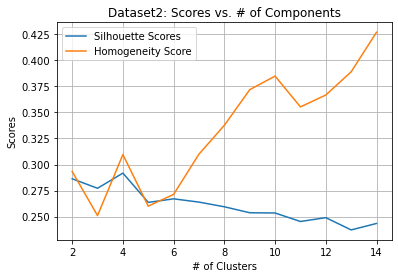

In [181]:
random_state = 7
range_n_clusters = np.arange(2,15,1)
sum_of_squared_distances = []
X_1_new = X_1_df.to_numpy()
silhouette_scores_2 = []
homog_scores_2 = []
for cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_2.append(silhouette_avg)
    homog_scores_2.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_2, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_2,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Scores")
plt.legend(loc="best")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2968850195294819
For n_clusters = 2 The average homogeneity_score is : 0.2826494470678585
For n_clusters = 3 The average silhouette_score is : 0.23728720234369935
For n_clusters = 3 The average homogeneity_score is : 0.30125208912580753
For n_clusters = 4 The average silhouette_score is : 0.3004739907911965
For n_clusters = 4 The average homogeneity_score is : 0.271458673847857
For n_clusters = 5 The average silhouette_score is : 0.23772748985096648
For n_clusters = 5 The average homogeneity_score is : 0.267146613116157
For n_clusters = 6 The average silhouette_score is : 0.25665478939551023
For n_clusters = 6 The average homogeneity_score is : 0.25510687989440683
For n_clusters = 7 The average silhouette_score is : 0.24024332938573853
For n_clusters = 7 The average homogeneity_score is : 0.33519472024430286
For n_clusters = 8 The average silhouette_score is : 0.2465204916329646
For n_clusters = 8 The average homogeneity_score is :

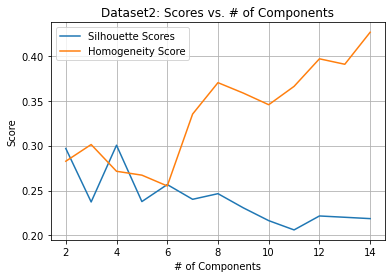

In [182]:
## Expectation Maximization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gmm_2 = []
homog_scores_gmm_2 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gmm_2.append(silhouette_avg)
    homog_scores_gmm_2.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gmm_2, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gmm_2,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Components')
plt.xlabel('# of Components')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [183]:
n_clusters=np.arange(2, 12, 1)
bics_gmm_2=[]
bics_err_2=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X2_transform) 
        
        tmp_bic.append(gmm.bic(X2_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_gmm_2.append(val)
    bics_err_2.append(err)


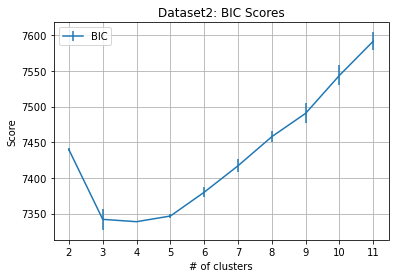

In [218]:
plt.errorbar(n_clusters,bics_gmm_2, yerr=bics_err_2, label='BIC')
plt.title("Dataset2: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()


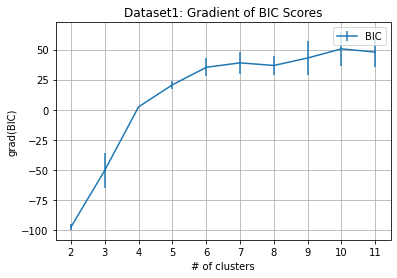

In [185]:

plt.errorbar(n_clusters, np.gradient(bics_gmm_2), yerr=bics_err_2, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Neural Network

In [201]:
X_train, X_test, y_train, y_test = train_test_split( X1_transform, Y_1, test_size=0.20, random_state=7)

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

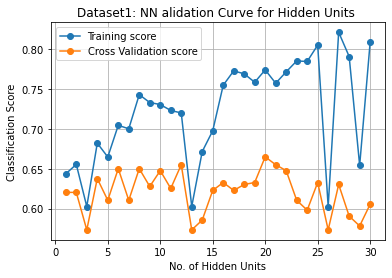

In [202]:
# hyperparameter tuning
hidden_unit_size = 30
test_data = np.zeros(hidden_unit_size)
train_data = np.zeros(hidden_unit_size)
hidden_layers = list(range(1, hidden_unit_size+1)) 

for i in hidden_layers:
    clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(i,2), random_state=7)
    clf_NN.fit(X_train,y_train)
    y_pred = clf_NN.predict(X_test)
    y_pred_train = clf_NN.predict(X_train)
    test_data[i-1] = metrics.accuracy_score(y_test, y_pred)
    train_data[i-1] = metrics.accuracy_score(y_train, y_pred_train)

plt.figure()
plt.plot(hidden_layers,train_data ,'o-', label='Training score')
plt.plot(hidden_layers,test_data ,'o-', label='Cross Validation score')
plt.title('Dataset1: NN alidation Curve for Hidden Units ')
plt.xlabel('No. of Hidden Units')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

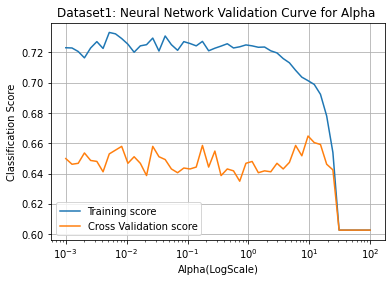

In [203]:
# Two hyperparameter to tune are the Learning Rate and numeber of hidden perceptrons hidden_layer_sizes
cv = StratifiedKFold(n_splits=5)
alpha_val = np.logspace(-3, 2, 50)
clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(8,2), random_state=7)
train_scores, test_scores = validation_curve(clf_NN, X_train, y_train, param_name="alpha",
                                             param_range=alpha_val, cv=cv, n_jobs=-1)

plt.figure()
plt.semilogx(alpha_val, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_val, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: Neural Network Validation Curve for Alpha ')
plt.xlabel('Alpha(LogScale)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
#plt.ticklabel_format(useOffset=False)
plt.show()

Fit time with reduced features = 0.17759180068969727
Inference time with Clusttering with reduced features = 0.0009448528289794922
66.00496277915633


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

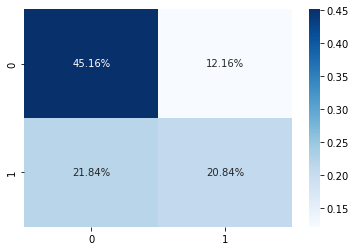

In [206]:
best_hidden_layers=(8,2)
best_alpha=0.01
clf_NN_best= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best.fit(X_train,y_train)
t_after = tm.time()
print('Fit time with reduced features =',  t_after - t_before)
t_before = tm.time()
y_pred = clf_NN_best.predict(X_test)
t_after = tm.time()
#inference_time[4] = t_after - t_before
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print('Inference time with Clusttering with reduced features =',  t_after - t_before)
print(metrics.accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


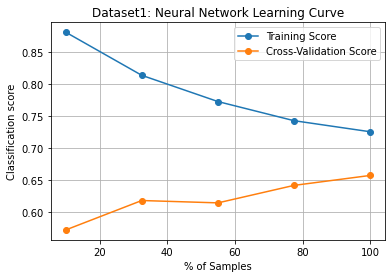

In [205]:
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

In [196]:
# After clusterring and adding features 

In [207]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split( X_1_new , Y_1, test_size=0.20, random_state=7)

time with Clusttering and added new features = 0.15758681297302246
Inferece time with Clusttering and added new features = 0.0008759498596191406
66.25310173697271


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

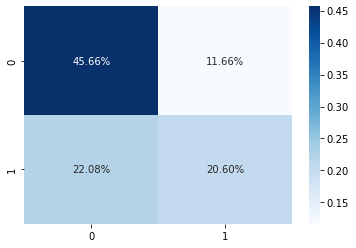

In [208]:
best_hidden_layers=(8,2)
best_alpha=0.02
clf_NN_best_c= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best_c.fit(X_train_c,y_train_c)
t_after = tm.time()
print('time with Clusttering and added new features =',  t_after - t_before)
t_before = tm.time()
y_pred_c = clf_NN_best_c.predict(X_test_c)
t_after = tm.time()
print('Inferece time with Clusttering and added new features =',  t_after - t_before)
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print(metrics.accuracy_score(y_test_c, y_pred_c)*100)
cm=confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

